#Risk Factors of Cervical Cancer
**Source of dataset:**

Kelwin Fernandes (kafc _at_ inesctec _dot_ pt) - INESC TEC & FEUP, Porto, Portugal.

Jaime S. Cardoso - INESC TEC & FEUP, Porto, Portugal.

Jessica Fernandes - Universidad Central de Venezuela, Caracas, Venezuela.

##Import Statements

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##Preliminary Data Exploration

In [264]:
cc_df = pd.read_csv('/content/cervical_cancer.csv')

In [265]:
cc_df.shape

(858, 36)

In [266]:
cc_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [267]:
cc_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [268]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [269]:
cc_df['Dx:Cancer'].value_counts()

0    840
1     18
Name: Dx:Cancer, dtype: int64

##Data Cleaning

In [270]:
cc_df = cc_df.replace('?', np.nan)

Mind: *replace()* will not change the original dataframe, it creates a new dataframe.

In [271]:
cc_df.isna().sum().sort_values(ascending=False).head(10)

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:pelvic inflammatory disease      105
STDs:vulvo-perineal condylomatosis    105
STDs:HPV                              105
STDs:Hepatitis B                      105
dtype: int64

There are too many missing values in "*STDs: Time since first diagnosis*" and "*STDs: Time since last diagnosis*", drop them.

In [272]:
cc_df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:CIN', 'Dx:HPV', 'Dx'], axis=1, inplace=True)

In [273]:
cc_df.dropna(how='any', inplace=True)
cc_df.shape

(668, 31)

In [274]:
cc_df = cc_df.reset_index(drop=True)
cc_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
3,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
664,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
665,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
666,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [275]:
# cc_df['Number of sexual partners'] = pd.to_numeric(cc_df['Number of sexual partners'])
# cc_df['First sexual intercourse'] = pd.to_numeric(cc_df['First sexual intercourse'])
# cc_df['Num of pregnancies'] = pd.to_numeric(cc_df['Num of pregnancies'])
# cc_df['Smokes (years)'] = pd.to_numeric(cc_df['Smokes (years)'])
# cc_df['Smokes (packs/year)'] = pd.to_numeric(cc_df['Smokes (packs/year)'])
# cc_df['Hormonal Contraceptives (years)'] = pd.to_numeric(cc_df['Hormonal Contraceptives (years)'])
# cc_df['IUD (years)'] = pd.to_numeric(cc_df['IUD (years)'])
# cc_df['STDs (number)'] = pd.to_numeric(cc_df['STDs (number)'])

In [276]:
for col in cc_df.columns:
  cc_df[col] = pd.to_numeric(cc_df[col])

In [277]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

In [278]:
cc_df_bool = cc_df.replace({'Smokes': {1: True, 0: False},
                       'Hormonal Contraceptives': {1: True, 0: False},
                       'IUD': {1: True, 0: False},
                       'STDs': {1: True, 0: False},
                       'STDs:condylomatosis': {1: True, 0: False},
                       'STDs:cervical condylomatosis': {1: True, 0: False}, 
                       'STDs:vaginal condylomatosis': {1: True, 0: False},
                       'STDs:vulvo-perineal condylomatosis': {1: True, 0: False}, 
                       'STDs:syphilis': {1: True, 0: False},
                       'STDs:pelvic inflammatory disease': {1: True, 0: False},
                       'STDs:genital herpes': {1: True, 0: False},
                       'STDs:molluscum contagiosum': {1: True, 0: False}, 
                       'STDs:AIDS': {1: True, 0: False}, 
                       'STDs:HIV': {1: True, 0: False},
                       'STDs:Hepatitis B': {1: True, 0: False}, 
                       'STDs:HPV': {1: True, 0: False},
                       'Dx:Cancer': {1: True, 0: False},
                       'Hinselmann': {1: True, 0: False}, 
                       'Schiller': {1: True, 0: False}, 
                       'Citology': {1: True, 0: False}, 
                       'Biopsy': {1: True, 0: False}})

In [279]:
cc_df_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    bool   
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    bool   
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    bool   
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

In [280]:
cc_df_bool.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,False,0.0,0.0,False,0.0,False,...,False,False,False,False,0,False,False,False,False,False
1,15,1.0,14.0,1.0,False,0.0,0.0,False,0.0,False,...,False,False,False,False,0,False,False,False,False,False
2,52,5.0,16.0,4.0,True,37.0,37.0,True,3.0,False,...,False,False,False,False,0,True,False,False,False,False
3,46,3.0,21.0,4.0,False,0.0,0.0,True,15.0,False,...,False,False,False,False,0,False,False,False,False,False
4,42,3.0,23.0,2.0,False,0.0,0.0,False,0.0,False,...,False,False,False,False,0,False,False,False,False,False


##Correlation

In [281]:
factors_df = pd.DataFrame(cc_df, 
                          columns=['Age', 
                                   'Number of sexual partners', 
                                   'First sexual intercourse',
                                   'Num of pregnancies', 
                                   'Smokes', 
                                   'Smokes (years)', 
                                   'Smokes (packs/year)',
                                   'Hormonal Contraceptives', 
                                   'Hormonal Contraceptives (years)', 
                                   'IUD',
                                   'IUD (years)', 
                                   'STDs', 
                                   'STDs (number)', 
                                   'STDs:condylomatosis',
                                   'STDs:cervical condylomatosis', 
                                   'STDs:vaginal condylomatosis',
                                   'STDs:vulvo-perineal condylomatosis', 
                                   'STDs:syphilis',
                                   'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
                                   'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
                                   'STDs:Hepatitis B', 
                                   'STDs:HPV', 
                                   'STDs: Number of diagnosis'])

In [282]:
factors_df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis
Age,1.000000,0.086533,0.372709,0.562229,0.055570,0.225829,0.119631,0.087482,0.292857,0.260514,...,-0.026257,0.009298,0.025463,-0.032256,-0.001176,NaN,-0.001795,-0.032256,0.042321,-0.009647
Number of sexual partners,0.086533,1.000000,-0.150872,0.098446,0.233542,0.157667,0.164829,0.010872,0.027334,0.042537,...,-0.011577,0.031690,0.034869,-0.036001,0.034869,NaN,0.034305,-0.012377,0.015916,0.028022
First sexual intercourse,0.372709,-0.150872,1.000000,-0.070213,-0.095313,-0.031433,-0.026922,0.028351,0.003205,-0.046032,...,0.029963,-0.110380,-0.001932,0.025241,-0.015519,NaN,0.004378,0.011654,0.035723,-0.020016
Num of pregnancies,0.562229,0.098446,-0.070213,1.000000,0.087312,0.202741,0.105120,0.155756,0.214918,0.219399,...,-0.030068,0.111444,-0.061439,-0.034995,0.044338,NaN,0.020697,-0.034995,-0.030815,0.036106
Smokes,0.055570,0.233542,-0.095313,0.087312,1.000000,0.719698,0.479872,0.010725,0.044432,-0.051074,...,0.072313,0.110728,-0.015863,-0.015863,-0.015863,NaN,0.034962,0.094515,0.055657,0.097559
Smokes (years),0.225829,0.157667,-0.031433,0.202741,0.719698,1.000000,0.719100,-0.013412,0.036247,0.039985,...,0.051873,0.024115,-0.011416,-0.011416,-0.011416,NaN,0.059320,0.108704,0.055767,0.069037
Smokes (packs/year),0.119631,0.164829,-0.026922,0.105120,0.479872,0.719100,1.000000,0.001055,0.012486,0.014682,...,0.014031,0.000558,-0.007612,-0.007612,-0.007612,NaN,0.039149,0.108487,-0.008895,0.025863
Hormonal Contraceptives,0.087482,0.010872,0.028351,0.155756,0.010725,-0.013412,0.001055,1.000000,0.457789,0.046750,...,-0.016247,-0.013834,0.028807,0.028807,-0.052045,NaN,-0.053591,-0.052045,0.040769,-0.039413
Hormonal Contraceptives (years),0.292857,0.027334,0.003205,0.214918,0.044432,0.036247,0.012486,0.457789,1.000000,0.099699,...,0.004540,-0.000952,-0.016023,-0.021225,-0.023826,NaN,-0.028451,-0.023826,0.054628,-0.033713
IUD,0.260514,0.042537,-0.046032,0.219399,-0.051074,0.039985,0.014682,0.046750,0.099699,1.000000,...,0.062118,-0.053900,-0.013770,-0.013770,-0.013770,NaN,0.018551,-0.013770,-0.019489,0.031175


In [283]:
factors_df['STDs:AIDS'].value_counts()

0.0    668
Name: STDs:AIDS, dtype: int64

In [284]:
factors_df['STDs:cervical condylomatosis'].value_counts()

0.0    668
Name: STDs:cervical condylomatosis, dtype: int64

The values of "*STDs:AIDS*" and "*STDs:cervical condylomatosis*" are all zoros. With no contribution to the classification, these two columns can be removed.

In [285]:
factors_df.drop(['STDs:AIDS', 'STDs:cervical condylomatosis'], axis=1, inplace=True)

In [286]:
mask = np.triu(np.ones_like(factors_df.corr(), dtype=np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


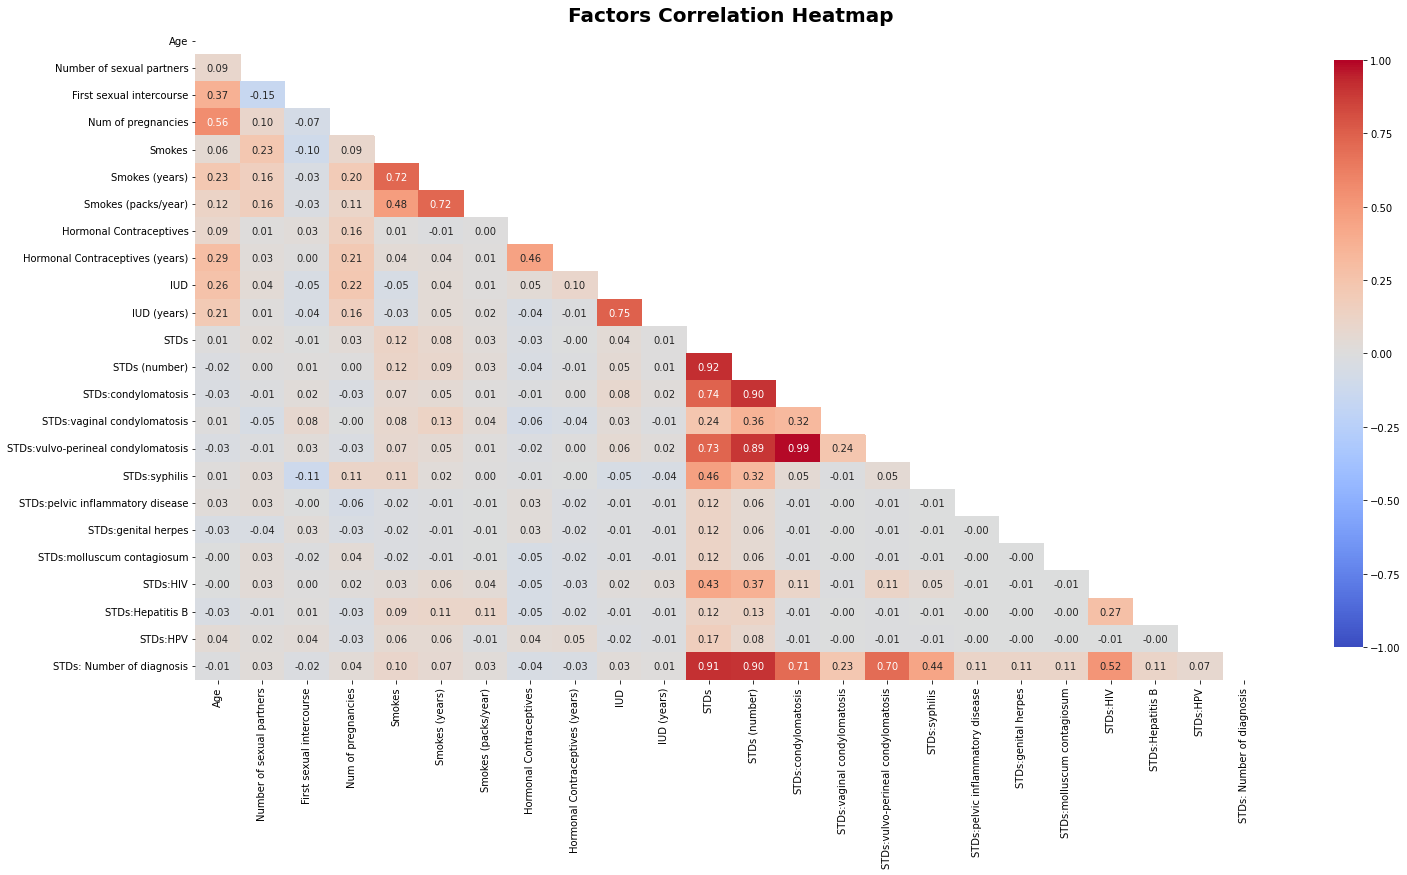

In [287]:
plt.figure(figsize=(24,12))
plt.title('Factors Correlation Heatmap', fontsize=20, fontweight='bold')
sns.heatmap(factors_df.corr(), 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm', 
            annot=True, 
            mask=mask, 
            fmt='.2f', 
            cbar_kws={'shrink':.9})

In [288]:
dx_factor_corr = factors_df.corrwith(pd.to_numeric(cc_df['Dx:Cancer']))
dx_factor_corr = pd.DataFrame(index=dx_factor_corr.index, columns=['Dx:Cancer'], data=dx_factor_corr)

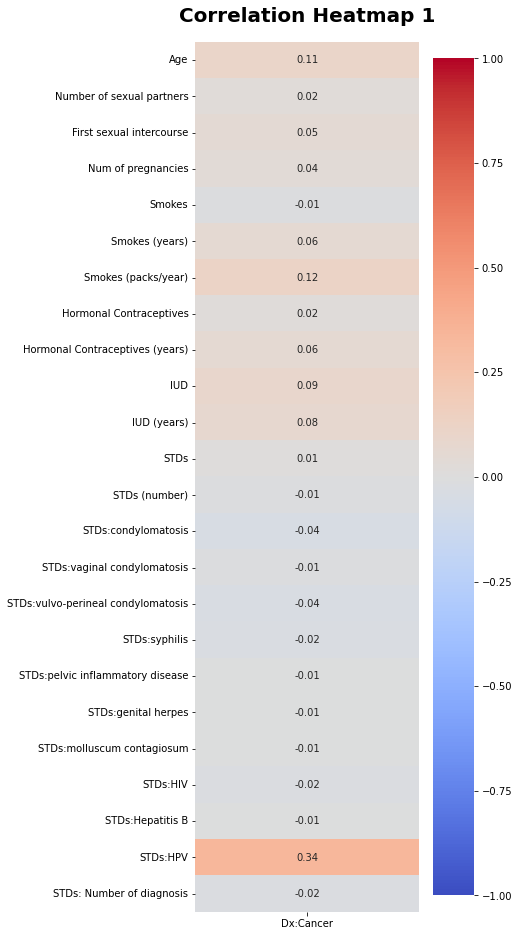

In [289]:
plt.figure(figsize=(5,16))
plt.title('Correlation Heatmap 1', fontsize=20, fontweight='bold', pad=20)
sns.heatmap(dx_factor_corr, 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f')

In [290]:
tests_df = pd.DataFrame(cc_df, columns=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'])
dx_tests_corr = tests_df.corrwith(cc_df['Dx:Cancer'])
dx_tests_corr = pd.DataFrame(index=dx_tests_corr.index, columns=['Dx:Cancer'], data=dx_tests_corr)

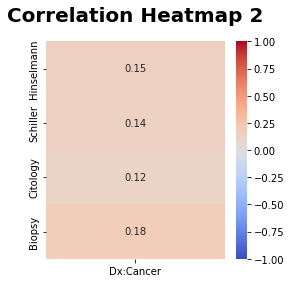

In [291]:
plt.figure(figsize=(4,4))
plt.title('Correlation Heatmap 2', fontsize=20, fontweight='bold', pad=20)
sns.heatmap(dx_tests_corr, 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f')

Poor correlation between the life style, medical history, test results and the diagnosis result. Why?

In [292]:
cc_df['Dx:Cancer'].value_counts()

0    651
1     17
Name: Dx:Cancer, dtype: int64

Obviously, the original dataset is an extremely imbalanced dataset.

##Synthetic Sampling

In [293]:
X = cc_df_bool.drop(['STDs:AIDS', 'STDs:cervical condylomatosis', 'Dx:Cancer'], axis=1)
y = cc_df_bool['Dx:Cancer']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=27)

In [295]:
sm = SMOTE(random_state=27, sampling_strategy=0.25)
X_train, y_train = sm.fit_resample(X_train, y_train)

X_train.shape, y_train.shape

((486, 28), (486,))

In [296]:
y_train.value_counts()

False    389
True      97
Name: Dx:Cancer, dtype: int64

In [297]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Classification

###Decision Tree

In [298]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [299]:
y_train_pred_dt = dt_model.predict(X_train_scaled)

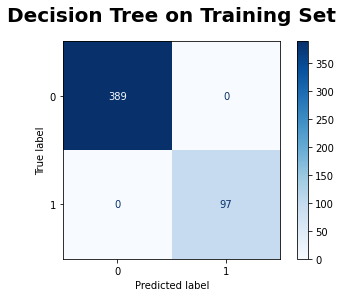

In [300]:
cm = confusion_matrix(y_train, y_train_pred_dt)
disp_dt_train = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_dt_train = disp_dt_train.plot(cmap='Blues')
plt.title('Decision Tree on Training Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [301]:
y_test_pred_dt = dt_model.predict(X_test_scaled)

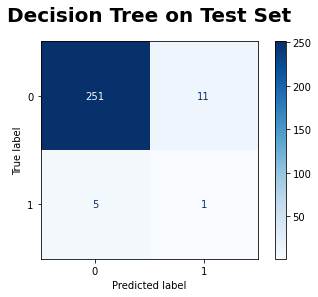

In [302]:
cm = confusion_matrix(y_test, y_test_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_dt = disp_dt.plot(cmap='Blues')
plt.title('Decision Tree on Test Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [303]:
results_df = pd.DataFrame(
    columns = ['Model', 'Recall', 'Accuracy', 'Precision', 'F1 Score'],
    data=[["Decision Tree", 
           recall_score(y_test, y_test_pred_dt),
           accuracy_score(y_test, y_test_pred_dt), 
           precision_score(y_test, y_test_pred_dt), 
           f1_score(y_test,y_test_pred_dt)]]
)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Decision Tree,0.166667,0.940299,0.083333,0.111111


###Random Forest

In [304]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [305]:
y_train_pred_rf = rf_model.predict(X_train_scaled)

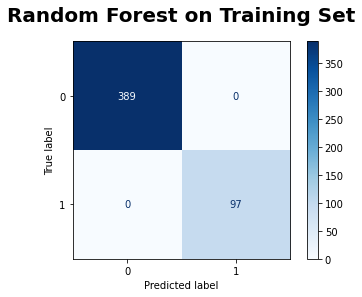

In [306]:
cm = confusion_matrix(y_train, y_train_pred_rf)
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_rf_train = disp_rf_train.plot(cmap='Blues')
plt.title('Random Forest on Training Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [307]:
y_test_pred_rf = rf_model.predict(X_test_scaled)

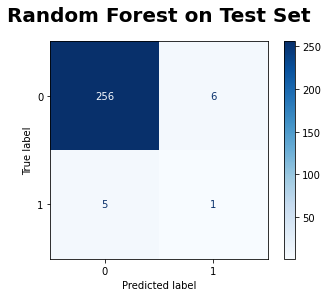

In [308]:
cm = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_rf = disp_rf.plot(cmap='Blues')
plt.title('Random Forest on Test Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [309]:
results_df_rf = pd.DataFrame(
    columns = ['Model', 'Recall', 'Accuracy', 'Precision', 'F1 Score'],
    data=[["Random Forest", 
           recall_score(y_test, y_test_pred_rf),
           accuracy_score(y_test, y_test_pred_rf), 
           precision_score(y_test, y_test_pred_rf), 
           f1_score(y_test,y_test_pred_rf)]]
)
results_df = results_df.append(results_df_rf, ignore_index=True)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Decision Tree,0.166667,0.940299,0.083333,0.111111
1,Random Forest,0.166667,0.958955,0.142857,0.153846


###Gradient Boosting

In [310]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [311]:
y_train_pred_gb = gb_model.predict(X_train_scaled)

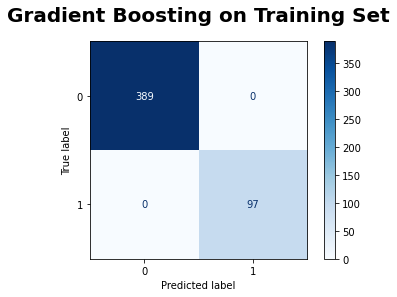

In [312]:
cm = confusion_matrix(y_train, y_train_pred_gb)
disp_gb_train = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_gb_train = disp_gb_train.plot(cmap='Blues')
plt.title('Gradient Boosting on Training Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [313]:
y_test_pred_gb = gb_model.predict(X_test_scaled)

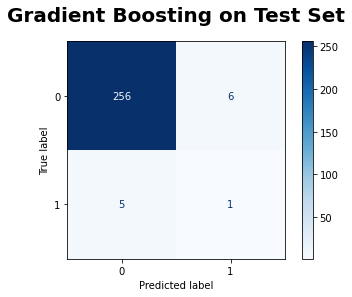

In [314]:
cm = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_gb = disp_gb.plot(cmap='Blues')
plt.title('Gradient Boosting on Test Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [315]:
results_df_gb = pd.DataFrame(
    columns = ['Model', 'Recall', 'Accuracy', 'Precision', 'F1 Score'],
    data=[["Gradient Boost", 
           recall_score(y_test, y_test_pred_gb),
           accuracy_score(y_test, y_test_pred_gb), 
           precision_score(y_test, y_test_pred_gb), 
           f1_score(y_test,y_test_pred_gb)]]
)
results_df = results_df.append(results_df_gb, ignore_index=True)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Decision Tree,0.166667,0.940299,0.083333,0.111111
1,Random Forest,0.166667,0.958955,0.142857,0.153846
2,Gradient Boost,0.166667,0.958955,0.142857,0.153846


The classifiers perform very well on the training set, but really bad on the test set.

####Tune the hyperparameters

In [316]:
# gb_model = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': list(range(1, 100)),
#     'max_depth': list(range(1,10))
# }

# grid_model = GridSearchCV(gb_model, param_grid, scoring='recall')
# grid_model.fit(X_train_scaled, y_train)

In [317]:
# grid_model.best_params_

In [318]:
gb_model = GradientBoostingClassifier(n_estimators=61, max_depth=4)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=61)

In [319]:
y_pred_gb_tuned = gb_model.predict(X_test_scaled)

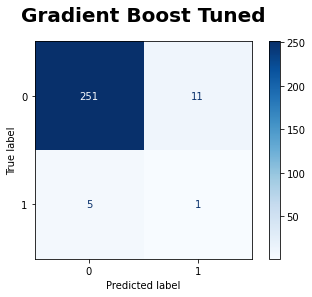

In [320]:
cm = confusion_matrix(y_test, y_pred_gb_tuned)
disp_gb_tuned = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_gb_tuned = disp_gb_tuned.plot(cmap='Blues')
plt.title("Gradient Boost Tuned", pad=20, fontsize=20, fontweight='bold')
plt.show()

In [321]:
results_df_gb_tuned = pd.DataFrame(
    columns=['Model', 'Recall', 'Accuracy', 'Precision', 'F1 Score'],
    data=[['Gradient Boost Tuned', 
           recall_score(y_test, y_pred_gb_tuned),
           accuracy_score(y_test, y_pred_gb_tuned), 
           precision_score(y_test, y_pred_gb_tuned), 
           f1_score(y_test, y_pred_gb_tuned)]]
)
results_df = results_df.append(results_df_gb_tuned, ignore_index=True)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Decision Tree,0.166667,0.940299,0.083333,0.111111
1,Random Forest,0.166667,0.958955,0.142857,0.153846
2,Gradient Boost,0.166667,0.958955,0.142857,0.153846
3,Gradient Boost Tuned,0.166667,0.940299,0.083333,0.111111


Tuning the hyperparameters contributes little to the recall.

##Regression

According to Dipti Punjani and Kishor Atkotiya's work[1], converting boolean attributes to numerical attributes with probabilities of belief might be able to enhance the accuracy.

In [322]:
X = cc_df.drop(['STDs:AIDS', 'STDs:cervical condylomatosis', 'Dx:Cancer'], axis=1)
y = cc_df['Dx:Cancer'].replace({True: 1.0, False: 0.0})

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=27)

In [324]:
sm = SMOTE(random_state=27, sampling_strategy=0.25)
X_train, y_train = sm.fit_resample(X_train, y_train)

X_train.shape, y_train.shape

((486, 28), (486,))

In [325]:
y_train.value_counts()

0    389
1     97
Name: Dx:Cancer, dtype: int64

In [326]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Regression Tree

In [327]:
regt_model = DecisionTreeRegressor()
regt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [328]:
y_train_pred_regt = regt_model.predict(X_train_scaled)

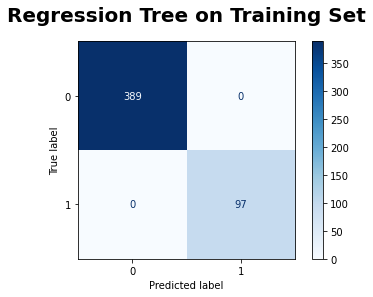

In [329]:
cm = confusion_matrix(y_train, y_train_pred_regt)
disp_regt_train = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_regt_train = disp_regt_train.plot(cmap='Blues')
plt.title('Regression Tree on Training Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [330]:
y_test_pred_regt = regt_model.predict(X_test_scaled)

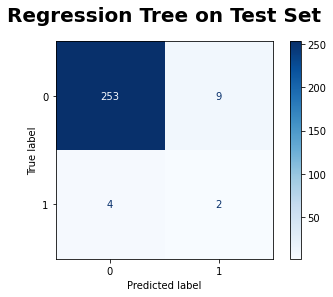

In [331]:
cm = confusion_matrix(y_test, y_test_pred_regt)
disp_regt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_regt = disp_regt.plot(cmap='Blues')
plt.title('Regression Tree on Test Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [332]:
results_df_regt = pd.DataFrame(
    columns=['Model', 'Recall', 'Accuracy', 'Precision', 'F1 Score'],
    data=[['Regression Tree', 
           recall_score(y_test, y_test_pred_regt),
           accuracy_score(y_test, y_test_pred_regt), 
           precision_score(y_test, y_test_pred_regt), 
           f1_score(y_test,y_test_pred_regt)]]
)
results_df = results_df.append(results_df_regt, ignore_index=True)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Decision Tree,0.166667,0.940299,0.083333,0.111111
1,Random Forest,0.166667,0.958955,0.142857,0.153846
2,Gradient Boost,0.166667,0.958955,0.142857,0.153846
3,Gradient Boost Tuned,0.166667,0.940299,0.083333,0.111111
4,Regression Tree,0.333333,0.951493,0.181818,0.235294


###Gradient Boosting for Regression





In [333]:
gbreg_model = GradientBoostingRegressor()
gbreg_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [334]:
y_train_pred_gbreg = gbreg_model.predict(X_train_scaled)

In [335]:
num_0 = y_train.value_counts()[0]

In [336]:
threshold = (np.sort(y_train_pred_gbreg)[num_0-1] + np.sort(y_train_pred_gbreg)[num_0])/2
threshold

0.30462127372986647

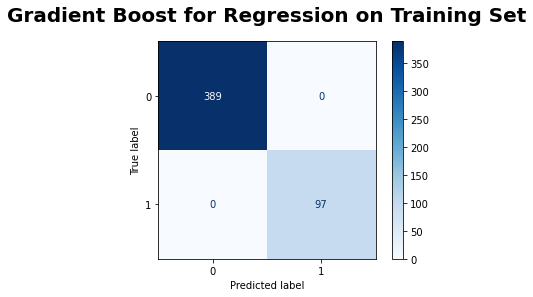

In [337]:
y_train_pred_gbreg = np.where(y_train_pred_gbreg > threshold, 1, 0)
cm = confusion_matrix(y_train, y_train_pred_gbreg)
disp_gbreg_train = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_gbreg_train = disp_gbreg_train.plot(cmap='Blues')
plt.title('Gradient Boost for Regression on Training Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [338]:
y_test_pred_gbreg = gbreg_model.predict(X_test_scaled)

In [339]:
y_test_pred_gbreg = np.where(y_test_pred_gbreg > threshold, 1, 0)
y_test_pred_gbreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

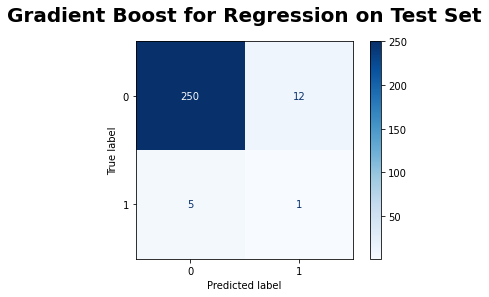

In [340]:
cm = confusion_matrix(y_test, y_test_pred_gbreg)
disp_gbreg = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_gbreg = disp_gbreg.plot(cmap='Blues')
plt.title('Gradient Boost for Regression on Test Set', pad=20, fontsize=20, fontweight='bold')
plt.show()

In [341]:
results_df_gbreg = pd.DataFrame(
    columns=['Model', 'Recall', 'Accuracy', 'Precision', 'F1 Score'],
    data=[['Gradient Boost for Regr', 
           recall_score(y_test, y_test_pred_gbreg),
           accuracy_score(y_test, y_test_pred_gbreg), 
           precision_score(y_test, y_test_pred_gbreg), 
           f1_score(y_test,y_test_pred_gbreg)]]
)
results_df = results_df.append(results_df_gbreg, ignore_index=True)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Decision Tree,0.166667,0.940299,0.083333,0.111111
1,Random Forest,0.166667,0.958955,0.142857,0.153846
2,Gradient Boost,0.166667,0.958955,0.142857,0.153846
3,Gradient Boost Tuned,0.166667,0.940299,0.083333,0.111111
4,Regression Tree,0.333333,0.951493,0.181818,0.235294
5,Gradient Boost for Regr,0.166667,0.936567,0.076923,0.105263


##Results Overview

In [342]:
results_df.sort_values(['Recall','Precision'], ascending=False, inplace=True, ignore_index=True)
results_df

,Model,Recall,Accuracy,Precision,F1 Score
0,Regression Tree,0.333333,0.951493,0.181818,0.235294
1,Random Forest,0.166667,0.958955,0.142857,0.153846
2,Gradient Boost,0.166667,0.958955,0.142857,0.153846
3,Decision Tree,0.166667,0.940299,0.083333,0.111111
4,Gradient Boost Tuned,0.166667,0.940299,0.083333,0.111111
5,Gradient Boost for Regr,0.166667,0.936567,0.076923,0.105263


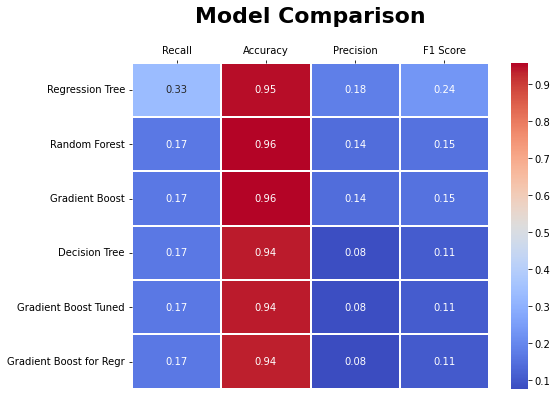

In [343]:
plt.figure(figsize=(8,6))
data = results_df.set_index('Model')
ax = sns.heatmap(data, annot=True, fmt=".2f", linewidth=1, cmap='coolwarm',)
ax.xaxis.tick_top()
plt.title('Model Comparison', fontsize=22, fontweight='bold', pad=40)
plt.ylabel('')
plt.show()

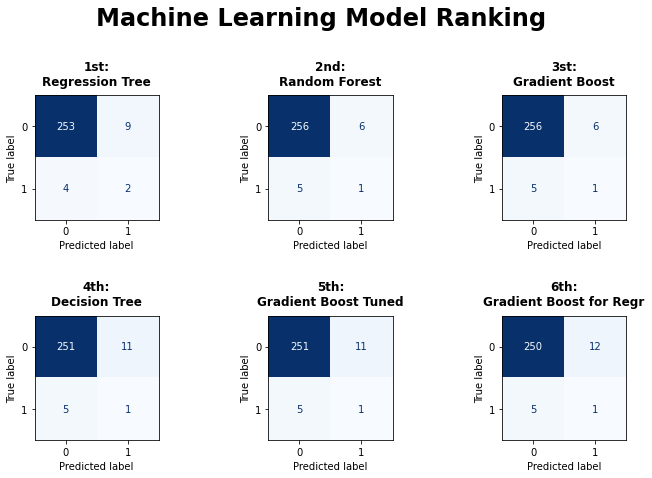

In [344]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

ranks = ['1st', '2nd', '3st', '4th', '5th', '6th']
confusion_matrics = [disp_regt, disp_gb, disp_rf, disp_gb_tuned, disp_dt, disp_gbreg]
names = list(results_df.Model)

for rank, name, cm, ax in zip(ranks, names, confusion_matrics, axes.flatten()):
  disp = cm.plot(cmap='Blues', ax=ax, colorbar=False)
  ax.set_title(f'{rank}:\n{name}', fontweight='bold', fontsize=12, pad=10)

plt.suptitle('Machine Learning Model Ranking', fontsize=24, fontweight='bold', y=1.1)

plt.tight_layout(h_pad=3)
plt.show()

Despite synthetic sampling, a variety of models, two data processing methods, and hyperparameter adjustments, the problem of extremely imbalanced dataset still cannot be effectively solved. The recall rate of the models for diagnosing cervical cancer can merely reach 33%.

**Reference:**

[1] Punjani, Dipti & Atkotiya, Kishor. (2019). Cervical Cancer Test Identification Classifier using Decision Tree Method. 7. 4. 10.32622/ijrat.74201967.